## EDA on VNL2023 Dataset
-Download Dataset: [https://www.kaggle.com/datasets/yeganehbavafa/vnl-men-2023](https://www.kaggle.com/datasets/yeganehbavafa/vnl-men-2023)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Dataset Basic Enquiry

In [2]:
df= pd.read_csv("./VNL2023.csv")

In [9]:
df.shape

(131, 10)

In [4]:
df.sample(5)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
95,Bohme Yan,Germany,26,3.42,0.50,0.00,0.0,1.00,0.00,OP
57,Pajenk Alen,Slovenia,37,5.08,1.38,0.23,0.0,2.38,0.54,MB
31,Atanasov Martin,Bulgaria,27,8.33,1.08,0.67,0.0,3.17,5.25,OH
73,Szalpuk Artur,Poland,28,6.75,0.75,0.50,0.0,3.50,4.00,OH
93,Kolev Nikolay,Bulgaria,26,3.42,0.75,0.33,0.0,0.83,0.00,MB


In [11]:
df.columns

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')

In [5]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [6]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [7]:
df.duplicated().sum()

0

#### Heatmap

In [17]:
numeric_cols=df.select_dtypes(include=['int','float']).columns
corr_matrix= df[numeric_cols].corr()
print(corr_matrix)



              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


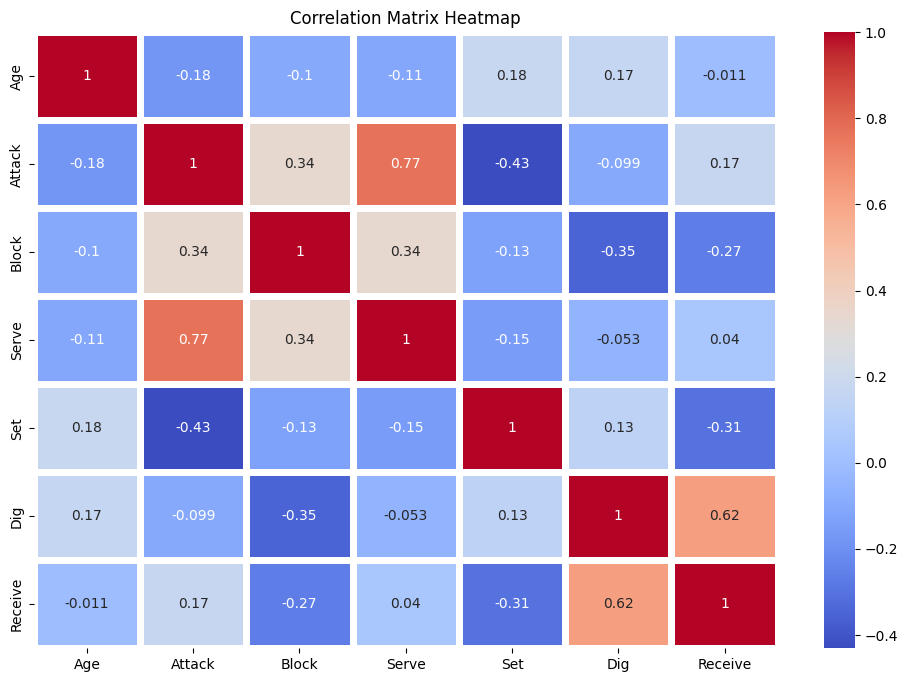

In [23]:
plt.figure(figsize=(12,8))# Specify Figure six=ze for better view
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### PieChart

In [26]:
position_counts =df['Position'].value_counts()
print(position_counts)

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64


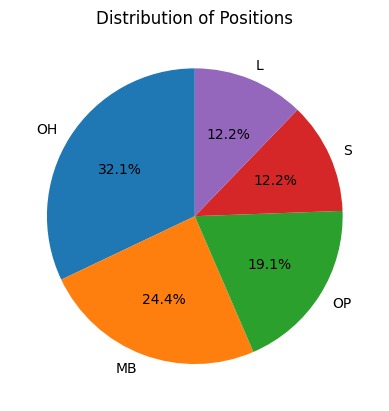

In [27]:
plt.pie(position_counts,labels=position_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Positions')
plt.show()

### GroupBy

In [37]:
avg_attack_by_country =df.groupby('Country')['Attack'].mean()
avg_attack_by_country.sort_values(ascending=False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

#### Which player position had the highest attack score in each country?

In [42]:
df.groupby(["Country", "Position"])["Attack"].max().reset_index().sort_values(ascending=False,by='Attack').head(10)


,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
48,Italy,OP,12.33


#### Countrywise Dig

In [44]:
df.groupby('Country')['Dig'].sum().sort_values(ascending=False)

Country
France       38.59
Italy        35.89
Argentina    33.88
Slovenia     33.85
Poland       32.56
Japan        32.38
Serbia       30.64
USA          28.42
Canada       26.50
Brazil       24.61
Iran         24.25
Bulgaria     22.45
China        22.08
Nederland    21.84
Germany      20.92
Cuba         20.26
Name: Dig, dtype: float64

### Plots

#### Scatterplot Between Block And Reacieve

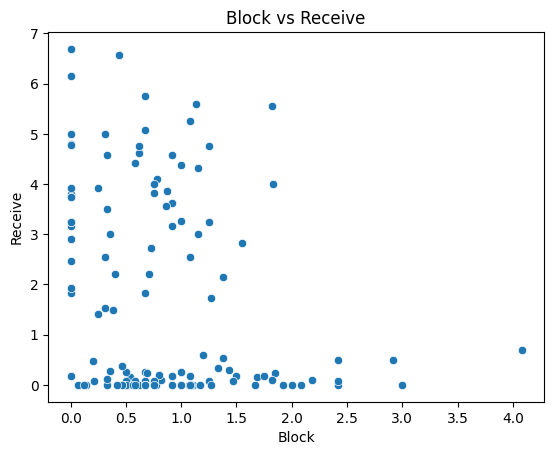

In [48]:
sns.scatterplot(data=df,x='Block',y='Receive')
plt.title('Block vs Receive')
plt.show()

#### Boxplot for Serve

<Axes: xlabel='Serve'>

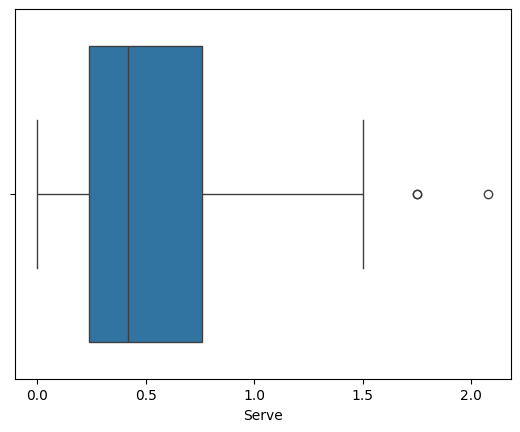

In [55]:
sns.boxplot(data=df,x='Serve')

#### Histogram

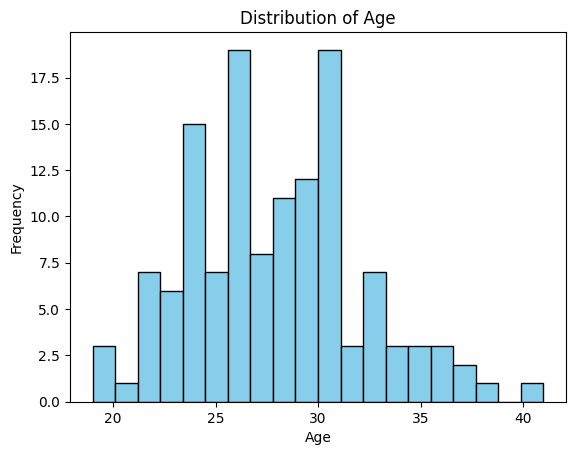

In [56]:
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()


#### barplot

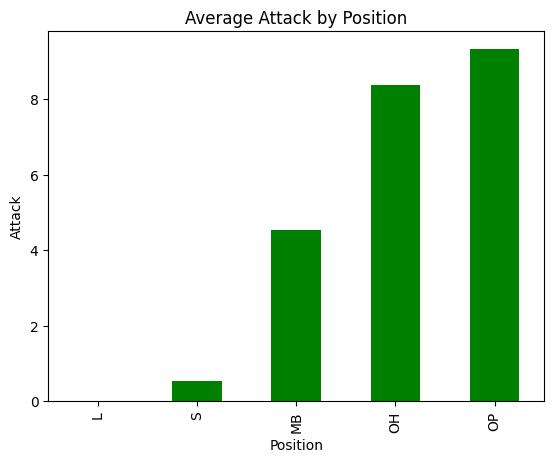

In [57]:
# Group by position and calculate mean attack
avg_attack_by_position = df.groupby("Position")["Attack"].mean().sort_values(ascending=True)

avg_attack_by_position.plot(kind="bar", color="green")


plt.title("Average Attack by Position")
plt.xlabel("Position")
plt.ylabel("Attack")
plt.show()

#### Lineplot

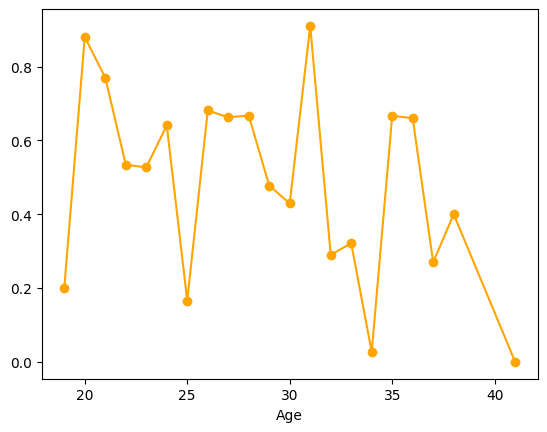

In [58]:
df.groupby("Age")["Serve"].mean().plot(kind="line", marker="o", linestyle="-", color="orange")
plt.title="Serve Trend Over Age Groups"
plt.xlabel="Age"
plt.ylabel="Serve"
plt.show()



In [59]:
total_attack_block_by_country = df.groupby("Country")[["Attack", "Block"]].sum()
total_attack_block_by_country


,Attack,Block
Country,,
Argentina,47.40,8.48
Brazil,42.00,6.30
Bulgaria,42.26,5.96
Canada,37.84,5.08
China,40.75,5.66
Cuba,44.41,6.76
France,66.70,9.08
Germany,38.67,5.04
Iran,42.37,8.39


<Axes: xlabel='Country'>

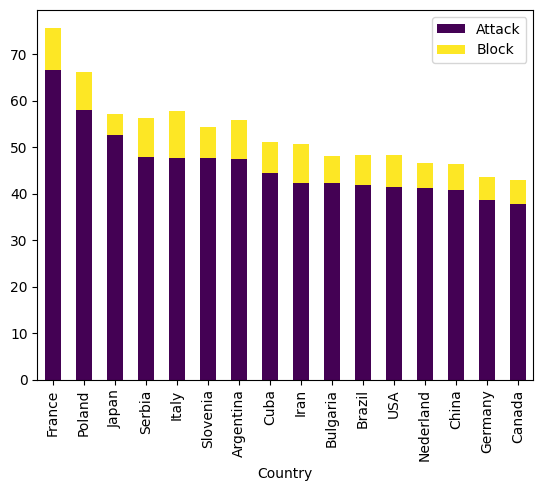

In [73]:
total_attack_block_by_country.sort_values(ascending=False,by='Attack').plot(kind="bar",stacked=True,colormap='viridis')

